In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#Text Preprocessing
import re
import string
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

#Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
# Load the model from the file
loaded_model = joblib.load('modelsk.joblib')

# Assuming the text is in a pandas DataFrame
data = {'text': ['hi im pavan , product is very good and working very well']}
df = pd.DataFrame(data)

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer and transform the text data into a matrix
X = vectorizer.fit_transform(df['text'])

# Predict the sentiment
prediction = loaded_model.predict(X)[0]

print(f"The predicted sentiment is: {prediction}")


ValueError: Number of features of the model must match the input. Model n_features is 12011 and input n_features is 10 

In [6]:
#Loading the Dataset
import pandas as pd
data = pd.read_csv(r'D:\AVRP\4projecs\plant\Flask Deployed App\reviews_0_250.csv')


In [7]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
token

RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)

In [8]:
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
cv

CountVectorizer(stop_words='english',
                tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>)

In [14]:
data['review_text'].describe

<bound method NDFrame.describe of 0         I use this with the Nudestix “Citrus Clean Bal...
1         I bought this lip mask after reading the revie...
2         My review title says it all! I get so excited ...
3         I’ve always loved this formula for a long time...
4         If you have dry cracked lips, this is a must h...
                                ...                        
602125    I can’t say enough great things about this pro...
602126    I have been using this product for over 6 week...
602127    I love the Triple Algae Eye Renewal Balm! Once...
602128    This made the lines around my eyes so much bet...
602129    So rich & creamy, yet not greasy . . .  It rea...
Name: review_text, Length: 602130, dtype: object>

In [21]:
df=data

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming the text is in a pandas DataFrame
data = {'text': ['hi im pavan , product is very good and working very well']}
df = pd.DataFrame(data)
df["text"]

0    hi im pavan , product is very good and working...
Name: text, dtype: object

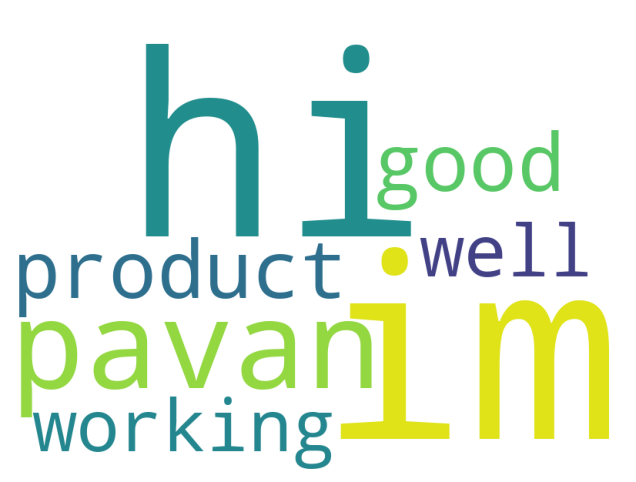

array([[0.37796447, 0.37796447, 0.37796447, 0.37796447, 0.37796447,
        0.37796447, 0.37796447]])

In [29]:
def clean_text(text):
    stop = stopwords.words('english')       
    punc = list(punctuation)
    bad_tokens = stop + punc
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text)
    word_tokens = [t for t in tokens if t.isalpha()]
    clean_token = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return " ".join(clean_token)


from sklearn.feature_extraction.text import TfidfVectorizer



df['text'] = df['text'].apply(clean_text)
allwords = ' '.join(word for word in df['text'])
wordcloud = WordCloud(
    width = 800,
    height = 600,
    background_color = 'white').generate(allwords)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



X=df['text'] 
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(X).toarray()
X

In [18]:
text_counts = vec.fit_transform(X).toarray()
text_counts

AttributeError: lower not found

In [ ]:
#Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['is_recommended'], test_size=0.25, random_state=5)
#Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score)
